## Exploratory Data Analysis on  Spotify Tracks (1922 - 2021)

- This Exploratory Data Analysis Project is done as a Course Project while learning Data Analytics and Visualization using various _Python libraries_ like _Numpy, Pandas, Matplotlib & Seaborn_ for the Course Zero-To-Pandas from Jovian.ai. 
- Resource Link: [click here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) (Dead Link)
- New Link: [click here](https://www.kaggle.com/subhaskumarray/spotify-tracks-data?select=tracks.csv)

## Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/subhaskumarray/spotify-tracks-data?select=tracks.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhirajshourya
Your Kaggle Key: ········


100%|██████████| 47.6M/47.6M [00:00<00:00, 92.7MB/s]


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './spotify-tracks-data'

In [5]:
import os
os.listdir(data_dir)

['tracks.csv', 'Spotify.png']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "eda-spotify-tracks" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "abhirajshourya/eda-spotify-tracks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/abhirajshourya/eda-spotify-tracks


'https://jovian.ai/abhirajshourya/eda-spotify-tracks'

## Data Preparation and Cleaning

- Importing Libraries

In [10]:
import numpy as np
import pandas as pd

- Reading Data Set

In [11]:
tracks = pd.read_csv('./spotify-tracks-data/tracks.csv')

In [12]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [13]:
tracks.sample(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
246441,4PKzf0THjE9AJc1JeMQEeW,Oras Ir Vanduo,35,195000,0,['Jessica Shy'],['0CinAWYkte8opxVAPI3nMu'],2020-10-28,0.730,0.797,1,-4.618,0,0.0300,0.00772,0.000239,0.1070,0.242,128.006,4
275127,7D9vuDLF7bg9G8ajYgpTbf,大條樂理,23,184627,0,['Endy Chow'],['5r0xeBSRKRJ5Dm63XzTZhE'],2004-11-26,0.599,0.800,2,-8.327,1,0.0401,0.06750,0.000000,0.1540,0.851,174.077,4
548639,1B0jRfLxiZHk0bKeZYs2mN,(揺れる心に) フェード・アウト,18,262107,0,['Junichi Inagaki'],['7tZ4vIF5bfR7cI1VOVPvpy'],1983,0.648,0.521,9,-13.572,0,0.0503,0.52700,0.000000,0.6060,0.689,114.815,4
127310,66w1iMtSQUJz5dsqJx4QPS,Pyramania,36,162987,0,['The Alan Parsons Project'],['2m62cc253Xvd9qYQ8d2X3d'],1978-06-01,0.840,0.625,7,-9.301,1,0.0627,0.03400,0.000018,0.1090,0.669,139.344,4
156500,7l6FdGpTecIdte6pWMdB6K,Infiel,49,246800,0,['Daniel Calderón'],['2O76CmUXGThMPPImBOnbUA'],2011-07-09,0.663,0.826,3,-1.899,0,0.0484,0.60500,0.000000,0.1830,0.904,159.809,4
126748,0b1gFyh1DnjTD6cHIpzPIG,Can I Tell You,32,212547,0,['Kansas'],['2hl0xAkS2AIRAu23TVMBG1'],1974,0.521,0.708,4,-6.579,0,0.1660,0.04360,0.001070,0.0869,0.714,102.316,4
553633,7INKtNAHIPu4n7my1Kn3nb,NOTHING,28,171533,0,['Hi-STANDARD'],['5bqCpmhZzNzRzzKSbbDkeH'],1999-06-30,0.356,0.904,4,-4.058,1,0.0576,0.00489,0.000025,0.1980,0.333,109.524,4
115163,0mahNcjYyqWUV28hTGkqEg,I/You,38,197143,0,['Elaine'],['5ZkuGe2wkDbeL8JmmhvMOx'],2019-09-29,0.778,0.490,9,-7.374,0,0.2610,0.59600,0.000027,0.0962,0.292,84.011,4
29170,1iCWFJ0hNwnIAGd5nTiGEj,Is It True What They Say About Dixie? - Digita...,10,148893,0,['Dean Martin'],['49e4v89VmlDcFCMyDv9wQ9'],1955-08-01,0.621,0.187,5,-15.256,1,0.0706,0.66500,0.000000,0.3570,0.796,149.063,4
560996,3pROyCFF6WyVtmCnbwLPxr,Hug,47,192907,0,['Mrs. GREEN APPLE'],['4QvgGvpgzgyUOo8Yp8LDm9'],2016-01-13,0.627,0.777,0,-4.510,0,0.0282,0.16500,0.000000,0.2430,0.614,112.996,4


In [14]:
#Parsing Date

tracks['release_date'] = pd.to_datetime(tracks['release_date'])
tracks['year'] = pd.DatetimeIndex(tracks['release_date']).year
tracks['month'] = pd.DatetimeIndex(tracks['release_date']).month

In [15]:
#Dealing with null & incorrect values

tracks['name'] = tracks[['name']].fillna('unknown')
tracks = tracks[tracks['year'] != 1900]

In [16]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
count,586671.000000,5.866710e+05,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000,586671.000000
mean,27.570067,2.300512e+05,0.044086,0.563594,0.542036,5.221608,-10.206076,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464817,3.873382,1988.566319,4.446315
std,18.370655,1.265262e+05,0.205286,0.166103,0.251923,3.519424,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764117,0.473163,22.831009,3.990973
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000,1.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,1974.000000,1.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,1992.000000,2.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,2007.000000,8.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,2021.000000,12.000000


---
---

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



In [17]:
#Importing Libraries

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

#### The trend of popularity and duration of the tracks over the years

In [18]:
tracks_pop = tracks.groupby(['year'])['popularity'].mean()
tracks_ms = tracks.groupby(['year'])['duration_ms'].mean() * 1.667 * (10**(-5))

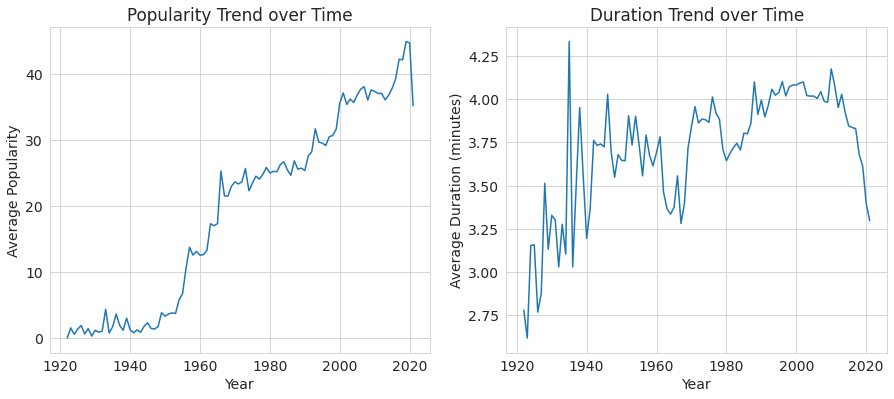

In [19]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fig, (ax1, ax2) =  plt.subplots(1,2)
ax1 = sns.lineplot(data = tracks_pop, ax=ax1)
ax2 = sns.lineplot(data = tracks_ms, ax=ax2)
ax1.set(xlabel='Year', 
        ylabel="Average Popularity", 
        title='Popularity Trend over Time', )
ax2.set(xlabel='Year', 
        ylabel="Average Duration (minutes)", 
        title='Duration Trend over Time', );

> We see increasing trend over the years and sudden growth in popularity in late 1950s to early 1970s.

> There is sudden drop in popularity in the year 2020 and early 2021.

> Duration of tracks increased suddenly between 1930 and 1940.

> Since 2015, Duration of Tracks has taken a fall.

---

####  Tracks Characteristics Over The Years.
- Visualize various charateristics of tracks in Time Series

In [20]:
track_char = tracks.groupby('year').mean()

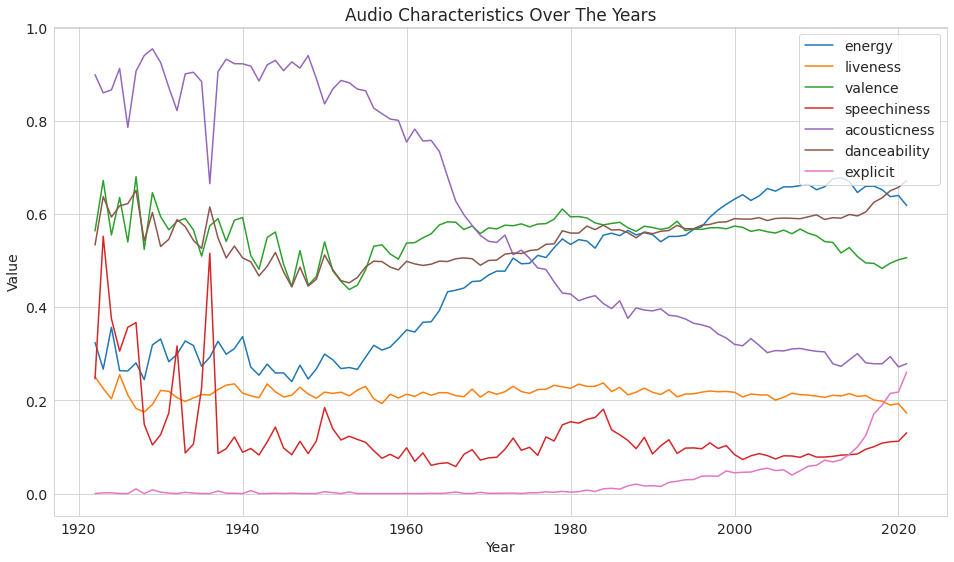

In [21]:
chars = ["energy","liveness","valence","speechiness","acousticness","danceability","explicit"]
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


for char in chars:
    var = track_char[char]
    char_trend = sns.lineplot(x=var.index, y=var)
char_trend.legend(chars, loc="upper right")
char_trend.set(xlabel = 'Year', ylabel='Value', title = 'Audio Characteristics Over The Years');

> 'Acousticness'of Tracks has declined over the years while 'Energy' of the Tracks has significantly increased over the Years.

> 'Explicit' Tracks can be seen increasing after late 1980s and have significantly increased since then.

---

#### Correlation between various characteristics of Tracks using Heatmap

In [22]:
chars_all = ['popularity', 'duration_ms', 'explicit', 'danceability',
             'energy','key', 'loudness', 'mode', 'speechiness', 
             'acousticness', 'instrumentalness','liveness', 
             'valence', 'tempo', 'time_signature']

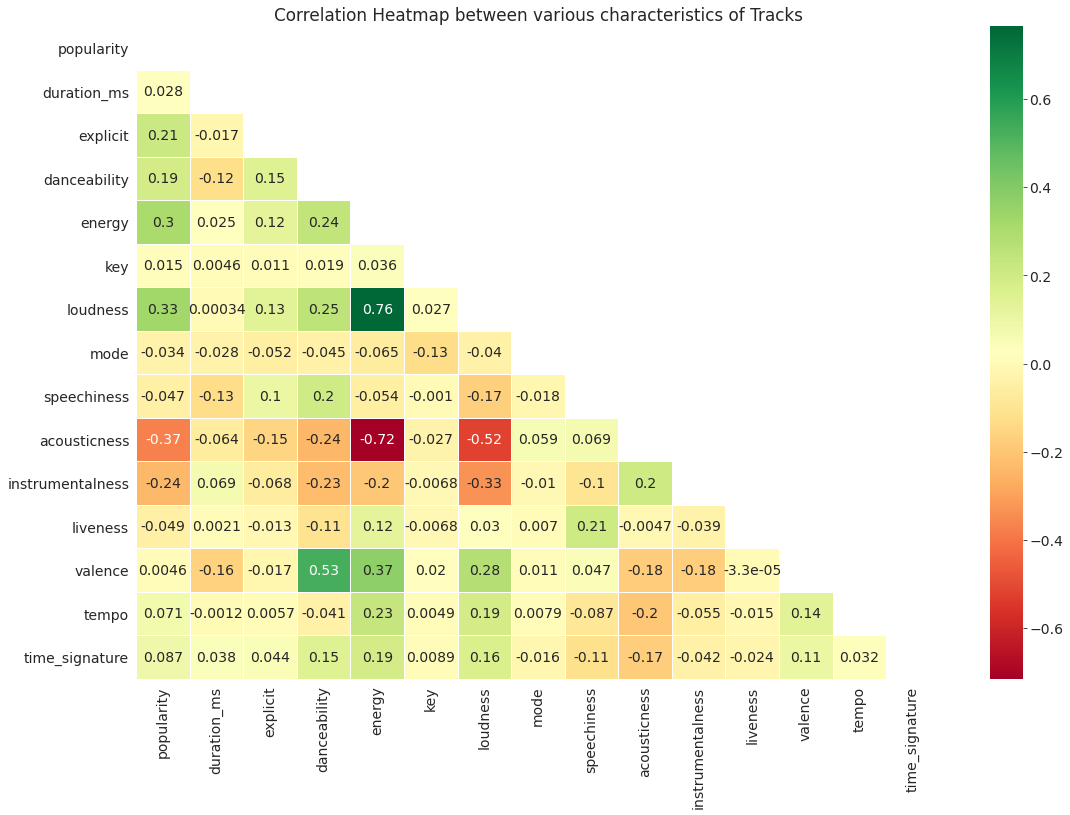

In [23]:
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18,12)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

mask = np.triu(np.ones_like(tracks[chars_all].corr(), dtype=bool))
ax = sns.heatmap(tracks[chars_all].corr(), annot=True, cmap='RdYlGn', mask=mask, linewidths=1)
ax.set(title = "Correlation Heatmap between various characteristics of Tracks");

> Energetic tracks have high positive correlation with Loudness.

> Valence has high positive correlation to those tracks who have danceability & danceability also has positive correlation with energy of the track.

> Acousticness and Energy have highly negative correlation.

> Time signature of energetic tracks are more, they have a high correlation as compared to other characteristics.

> Acoustic Tracks are not very popular.

---

#### Number of Tracks released every year!

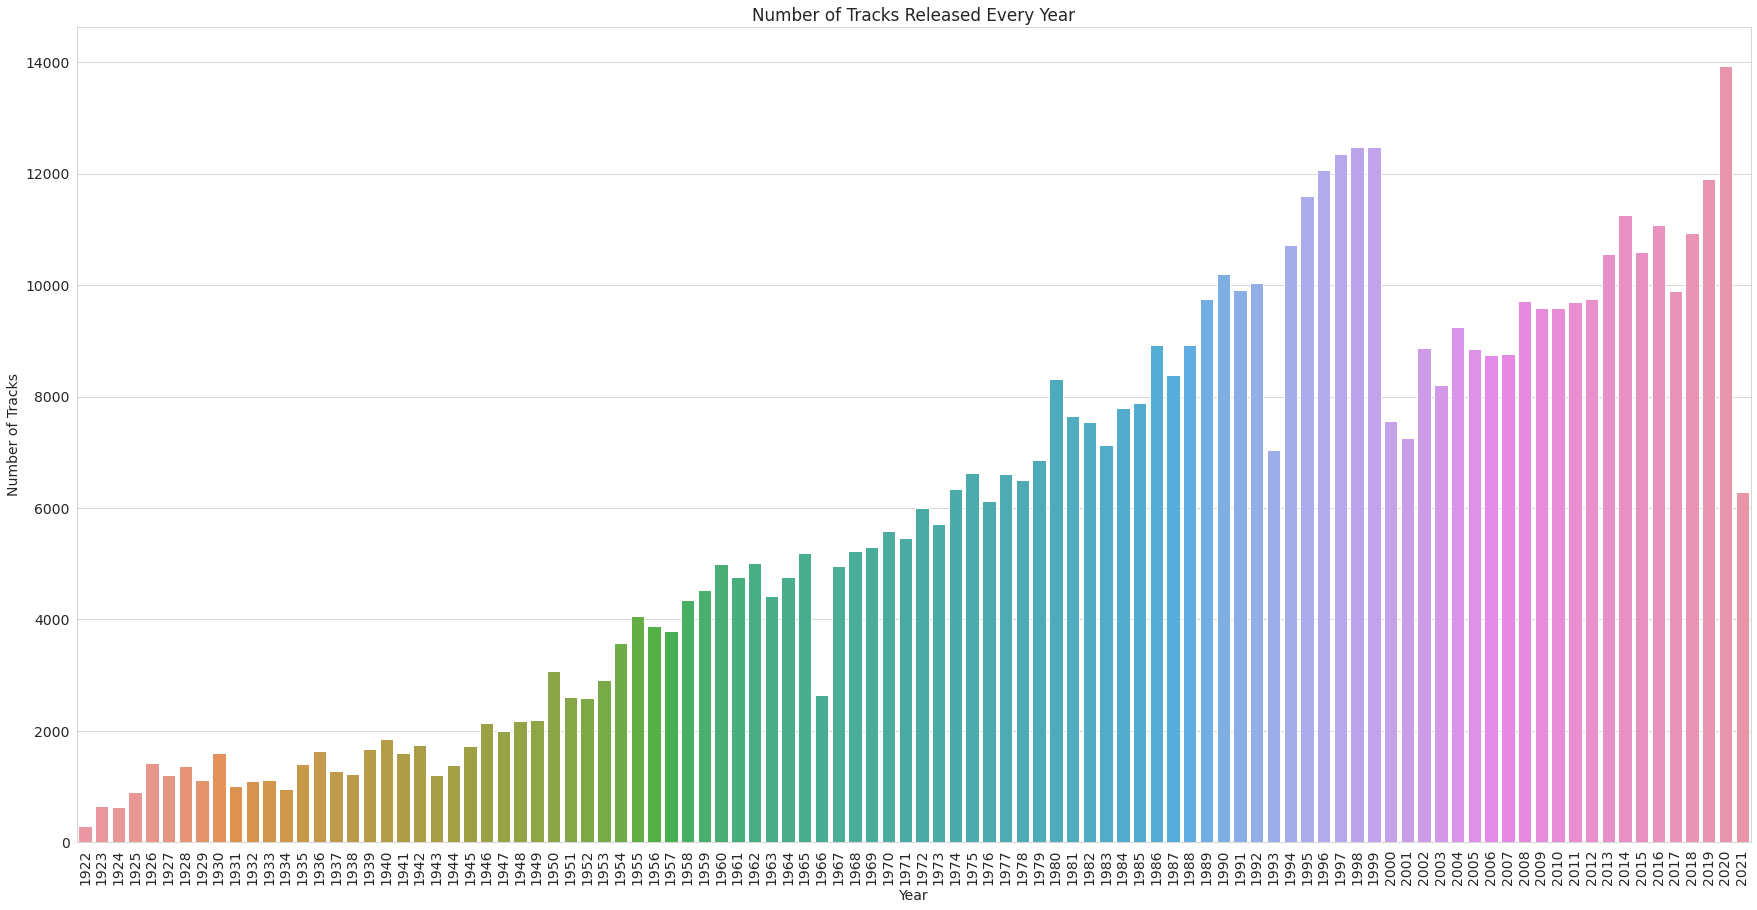

In [24]:
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (30,15)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
plt.xticks(rotation = 90)
ax = sns.countplot(data=tracks, x='year')
ax.set(ylabel='Number of Tracks', xlabel='Year', title='Number of Tracks Released Every Year');

> Looks like there  was gradual growth in release of tracks until the year 2000.

> After 2000, Releases started growing again and peaked in 2020.

#### Number of Tracks categorized by Octaves -'keys', released every year!

In [25]:
tracks_key = tracks[['key', 'year']]
#tracks_key = tracks_key.assign(key=['C','C#','D','D#','E','F','F#','G','G#','A','B'])
tracks_key = tracks_key.assign(count=1)
tracks_key = tracks_key.pivot_table(index='year', columns='key', values='count', aggfunc='sum')

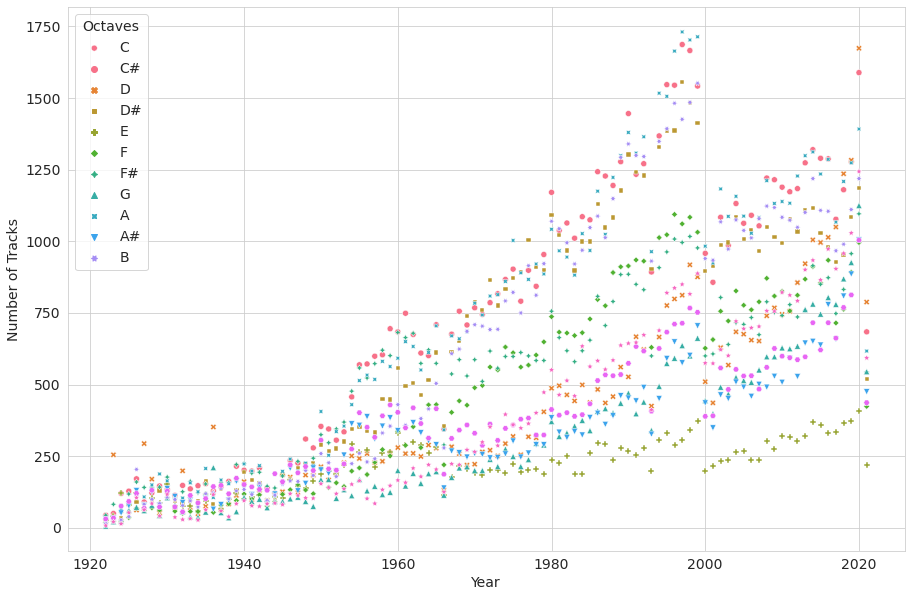

In [26]:
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fig = sns.scatterplot(data=tracks_key)
fig.set(ylabel='Number of Tracks', xlabel='Year')
plt.legend(title='Octaves', loc='upper left', labels=['C','C#','D','D#','E','F','F#','G','A','A#','B']);

> C# Octave can be seen to be the dominant one among all others.

> E Octave tracks are fewer in numbers.

#### Q1: 10  Most Popular & Explicit Tracks?

In [27]:
tracks[tracks['explicit'] == 1].sort_values('popularity', ascending=False).head(10)['name'].tolist()

['Peaches (feat. Daniel Caesar & Giveon)',
 'drivers license',
 'Save Your Tears',
 'Streets',
 'WITHOUT YOU',
 'Good Days',
 'Goosebumps - Remix',
 'Up',
 'positions',
 'DÁKITI']

#### Q2: List the top 10 Artists with most number of Tracks.

In [28]:
artist = tracks['artists'].value_counts().reset_index()['index'].head(10).tolist()
allart=[]
for art in artist:
    allart.append(art[2:-2])
allart

['Die drei ???',
 'TKKG Retro-Archiv',
 'Benjamin Blümchen',
 'Bibi Blocksberg',
 'Lata Mangeshkar',
 'Bibi und Tina',
 "Tintin', 'Tomas Bolme', 'Bert-Åke Varg",
 'Francisco Canaro',
 'Ella Fitzgerald',
 'Tadeusz Dolega Mostowicz']

#### Q3: Plot the variation in Modes over the years

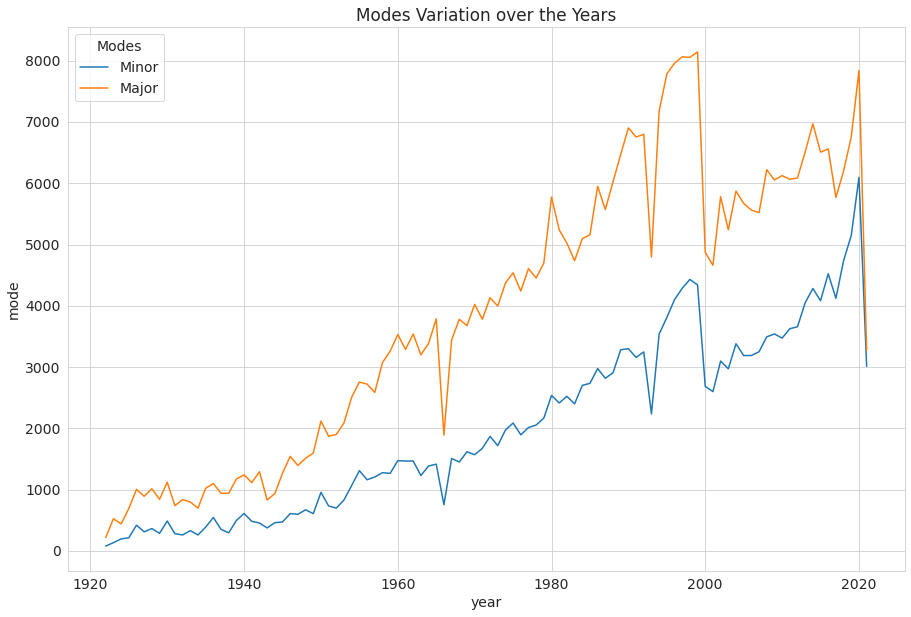

In [29]:
tracks_m_0 = tracks[tracks['mode'] == 0]
tracks_m_0 = tracks_m_0.groupby('year')['mode'].count().to_frame().reset_index()

tracks_m_1 = tracks[tracks['mode'] == 1]
tracks_m_1 = tracks_m_1.groupby('year')['mode'].count().to_frame().reset_index()

sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ax0 = sns.lineplot(data=tracks_m_0, x='year', y='mode')
ax1 = sns.lineplot(data=tracks_m_1, x='year', y='mode')
plt.title('Modes Variation over the Years')
plt.legend(title='Modes', labels=['Minor', 'Major']);

#### Q4: Most Popular Track & the Artist Name

In [30]:
poptrack = tracks[['name', 'popularity', 'artists']].sort_values(by='popularity', ascending=False).head(1)
poptrack[['name', 'artists']]

,name,artists
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']"


#### Q5: 10 Most Energetic and Loud Tracks

In [31]:
eng_loud = tracks[['name', 'artists','energy', 'loudness']].sort_values(by=['energy', 'loudness'], ascending=[False, False])

In [32]:
eng_loud.head(10)

,name,artists,energy,loudness
85263,Victim,['Komprex'],1.0,0.899
188631,Offender,['Dimension'],1.0,-0.024
499713,Hubschraubereinsatz,['DJ Düse'],1.0,-1.186
381438,Oct Launcher 8,['RedOgre'],1.0,-1.605
500552,Aua im Kopf (Morgen sind wir schlauer...),['Tobee'],1.0,-1.820
273792,Prima-Donna,['Leon Lai'],1.0,-2.700
487188,Die Pure Lust am Leben,['Almklausi'],1.0,-2.877
438628,Oppressed Masses - 2018 Remaster,['Carnage & Cluster'],1.0,-3.489
344663,6 Little Eggs,['The Brick Slayer'],1.0,-4.070
18347,Suno Suno Tumhen Sunaye,['K Dutta'],1.0,-4.363


## Inferences and Conclusion

- 'Lata Mangeshkar' is among the Top 10 Artists at 4th position.
- 'Acousticness'of Tracks has declined over the years while 'Energy' of the Tracks has significantly increased over the Years.
- 'Explicit' Tracks can be seen increasing after late 1980s and have significantly increased since then.
- We see increasing trend over the years and sudden growth in popularity in late 1950s to early 1970s.
- There is sudden drop in popularity in the year 2020 and early 2021.
- Duration of tracks increased suddenly between 1930 and 1940.
- Since 2015, Duration of Tracks has taken a fall.
- After 2000, Track Releases started growing again and peaked in 2020.

## References and Future Work

- [Stack Overflow](https://stackoverflow.com/) The Number 1 go to for any kind of help and idea for the problem.
- [Jovian Forum](https://jovian.ai/forum/) with people working on similar and advance projects, its much easier to ask anything.
- Thanks to Aakash NS Sir for the free course [Zero To Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas). This Course has boosted my knowledge and enhanced my skills.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>